# Importing Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

# Loading Dataset

In [2]:
data = pd.read_csv('Hackathon_Working_Data.csv')

# Understanding the Dataset and its components

In [3]:
data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [4]:
data.tail()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN
26984,M3,N10,31,T6013,15.0,1.0,15.0,15.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,SAJ INDS,BISK FARM,BISK FARM JUST GINGER


In [5]:
data.shape

(26985, 14)

In [6]:
data.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [8]:
data.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [9]:
data.nunique()

MONTH           3
STORECODE      10
DAY            31
BILL_ID      6424
BILL_AMT     1453
QTY            45
VALUE         640
PRICE         492
GRP            80
SGRP          174
SSGRP         232
CMP           354
MBRD          643
BRD          1315
dtype: int64

In [10]:
#categorical columns
categorical_columns = []
for i in data.columns:
    if(data[i].dtypes == 'object'):
        categorical_columns.append(i)

categorical_columns

['MONTH', 'STORECODE', 'BILL_ID', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD']

In [11]:
#numerical columns
numerical_columns = []
for j in data.columns:
    if(data[j].dtypes != 'object'):
        numerical_columns.append(j)

numerical_columns

['DAY', 'BILL_AMT', 'QTY', 'VALUE', 'PRICE']

# Basic Data preprocessing

In [12]:
data.isnull()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26981,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26982,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26983,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

# Exploratory Data Analysis

## 1. Sales per month

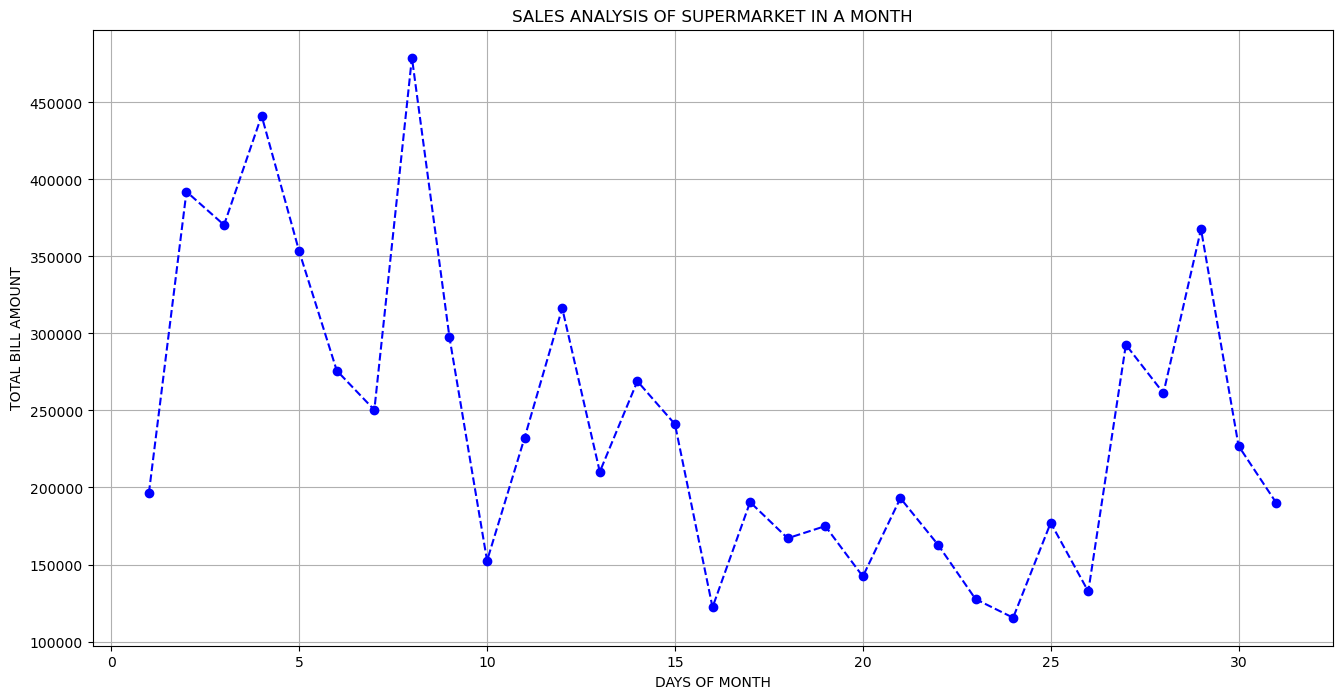

In [14]:
yearly_totals = data.groupby('DAY')['BILL_AMT'].sum().reset_index()
plt.figure(figsize=(16,8))
plt.plot(yearly_totals['DAY'], yearly_totals['BILL_AMT'], marker='o', linestyle='dashed', color='blue')
plt.title('SALES ANALYSIS OF SUPERMARKET IN A MONTH')
plt.xlabel('DAYS OF MONTH')
plt.ylabel('TOTAL BILL AMOUNT')
plt.grid(True)
plt.show()

## 2. Sales from Top 20 Categories

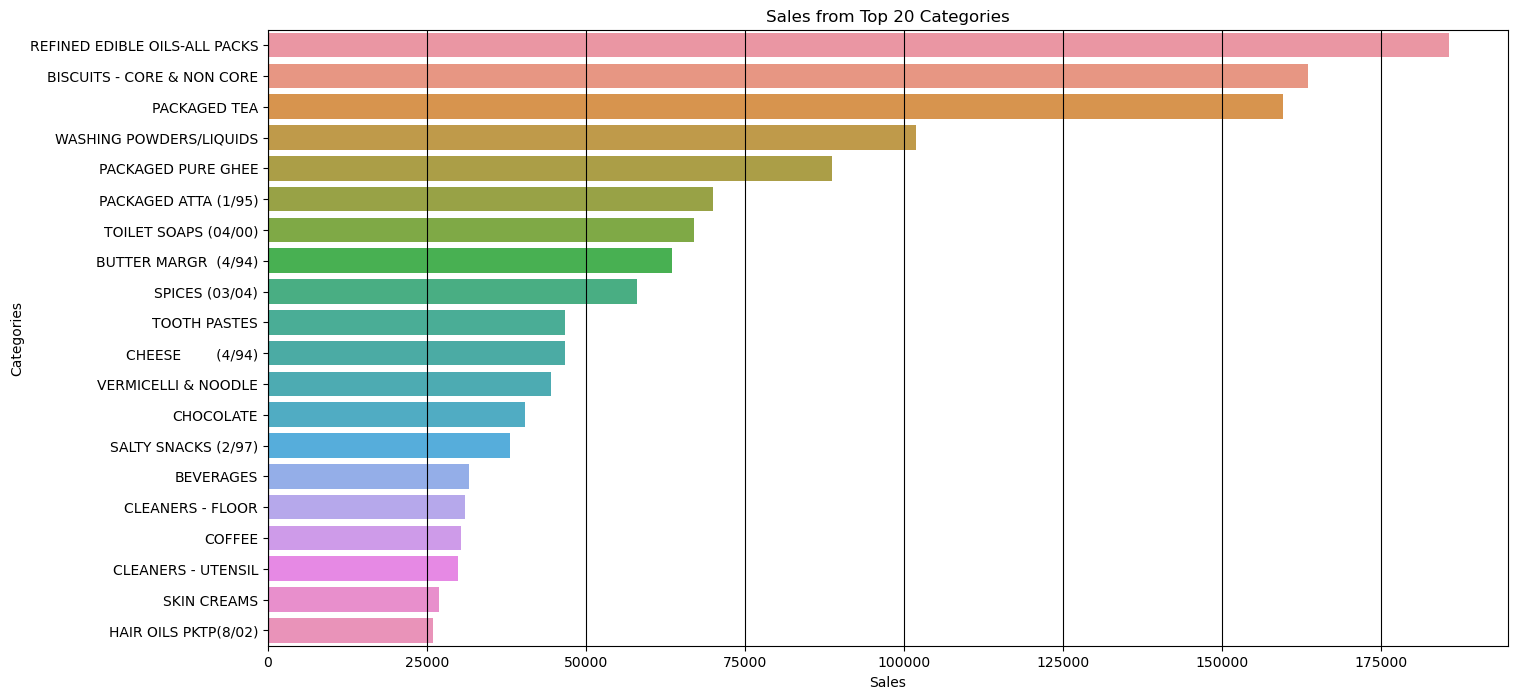

In [15]:
top_item_sales = data.groupby('GRP').sum().sort_values("VALUE",ascending = False)[0:20]
plt.figure(figsize=(16,8))
sns.barplot(x='VALUE', y=top_item_sales.index, data=top_item_sales)
plt.title("Sales from Top 20 Categories")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x', color='black');
plt.show()

## 3. Number of Units Sold by Stores

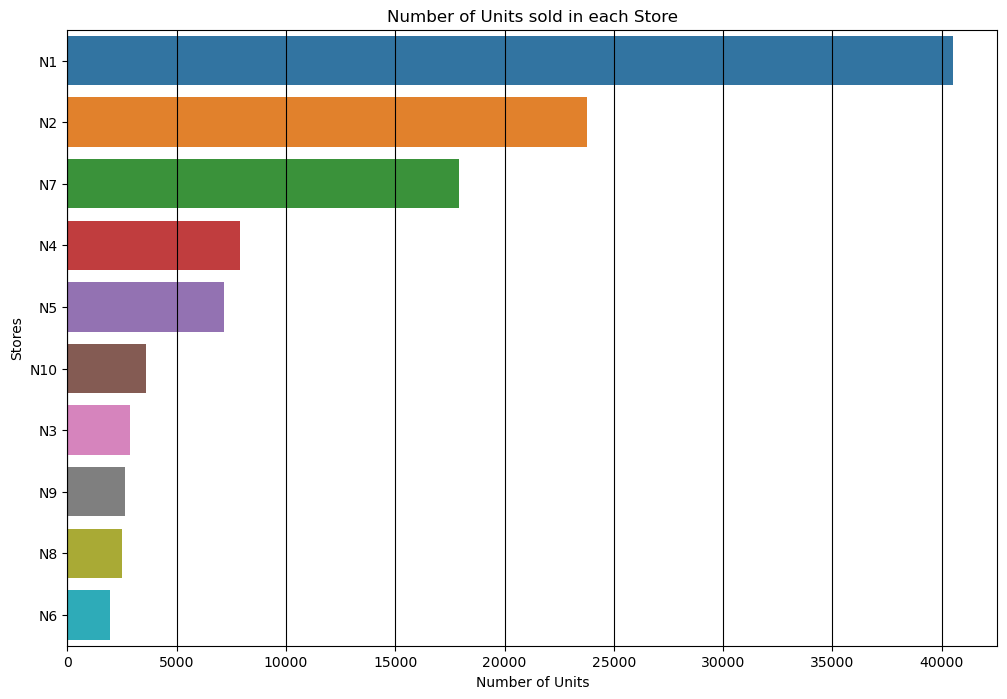

In [16]:
store_units = data.groupby('STORECODE').sum().sort_values("QTY",ascending=False)[['QTY','PRICE']]
plt.figure(figsize=(12,8))
sns.barplot(x='QTY',y=store_units.index,data=store_units)
plt.title("Number of Units sold in each Store")
plt.xlabel("Number of Units")
plt.ylabel("Stores")
plt.grid(axis='x',color='black')

## 4. Monthly Total Sales

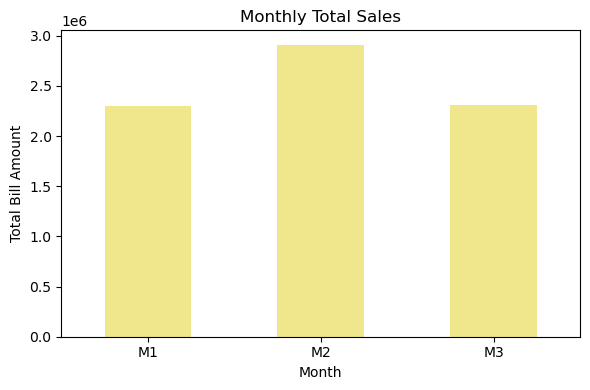

In [17]:
monthly_sales = data.groupby(data['MONTH'])['BILL_AMT'].sum()
plt.figure(figsize=(6, 4))
monthly_sales.plot(kind='bar', color='khaki')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Total Bill Amount')
plt.tight_layout()
plt.show()

## 5. Top 5 companies in each store

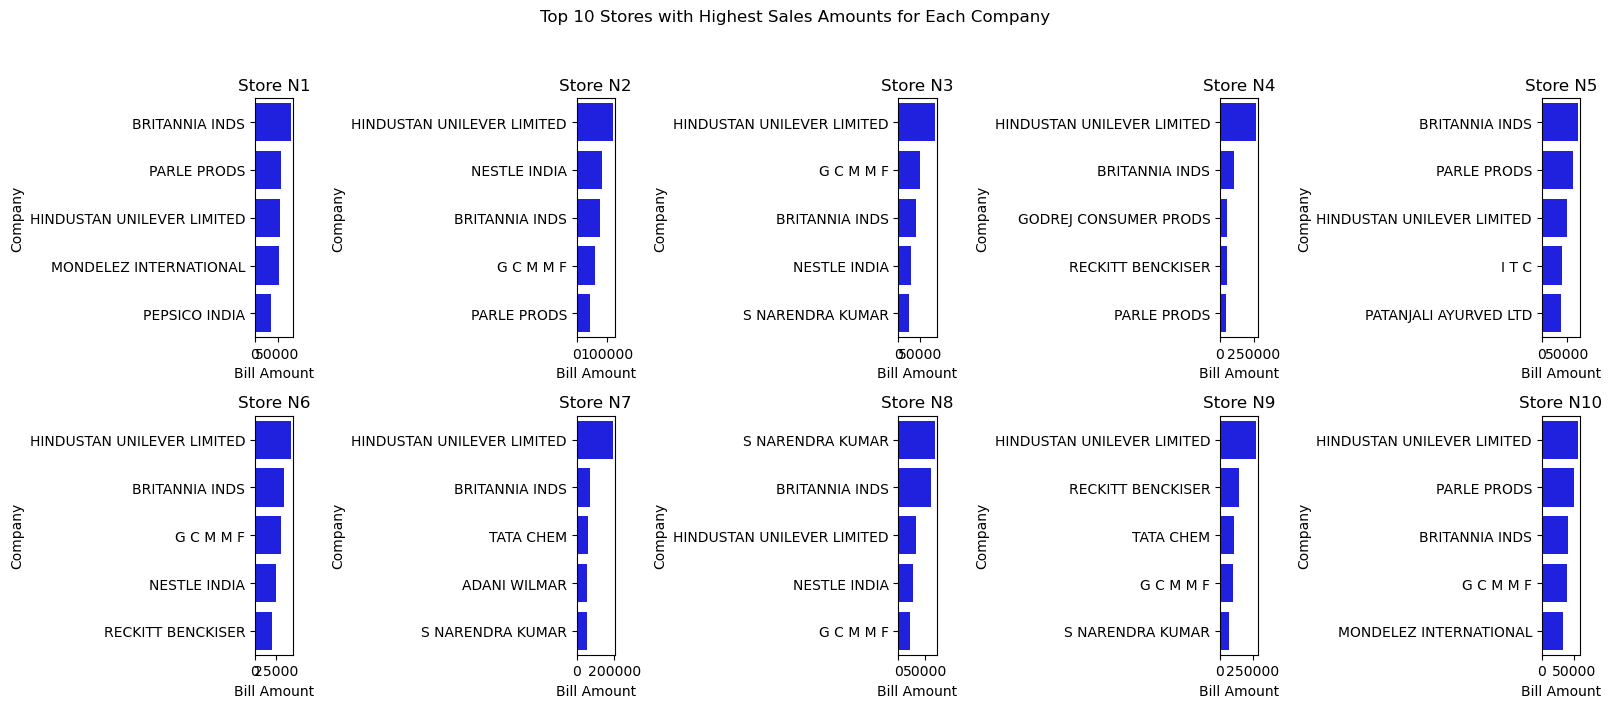

In [18]:
top_stores_by_company = pd.DataFrame(columns=['STORECODE', 'CMP', 'BILL_AMT'])

unique_storecodes = data['STORECODE'].unique()

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
fig.suptitle('Top 10 Stores with Highest Sales Amounts for Each Company')

for i, storecode in enumerate(unique_storecodes[:10]):
    store_data = data[data['STORECODE'] == storecode]

    top_companies = store_data.groupby('CMP')['BILL_AMT'].sum().reset_index()

    top_companies = top_companies.sort_values(by='BILL_AMT', ascending=False).head(5)

    top_companies['STORECODE'] = storecode

    top_stores_by_company = pd.concat([top_stores_by_company, top_companies], ignore_index=True)
    
    row, col = i // 5, i % 5
    ax = axs[row, col]
    sns.barplot(x='BILL_AMT', y='CMP', data=top_companies, ax=ax, color='blue')
    ax.set_title(f'Store {storecode}')
    ax.set_xlabel('Bill Amount')
    ax.set_ylabel('Company')

plt.tight_layout(rect=[0, 0.10, 1, 0.95])
plt.show()

## 6. Daily Sales of each store

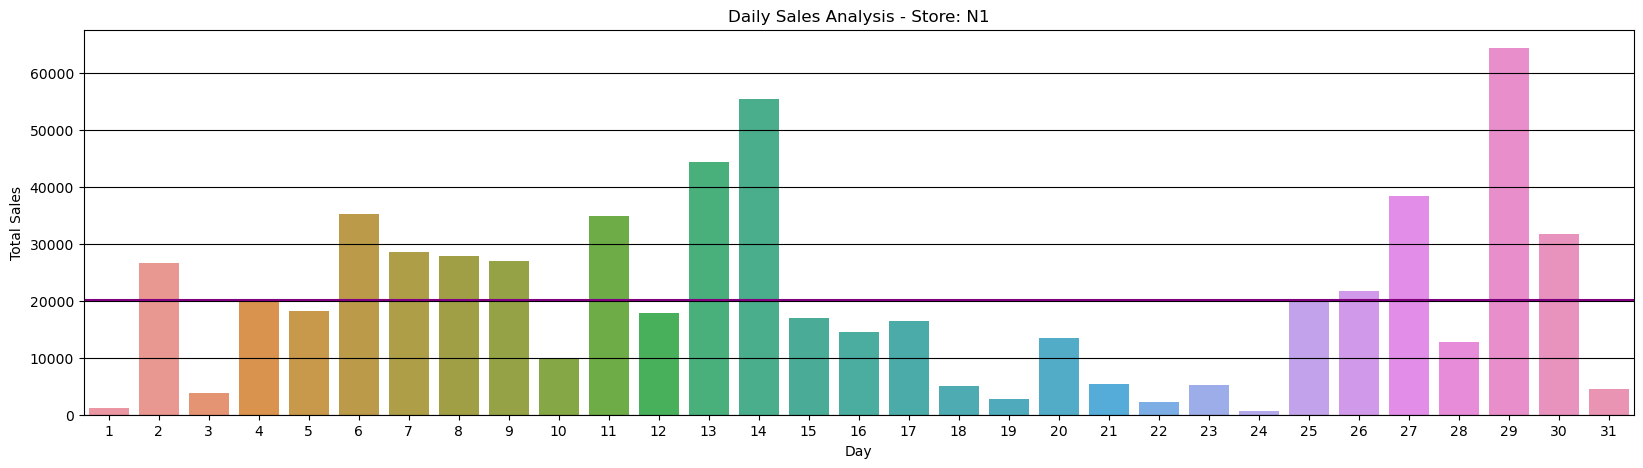

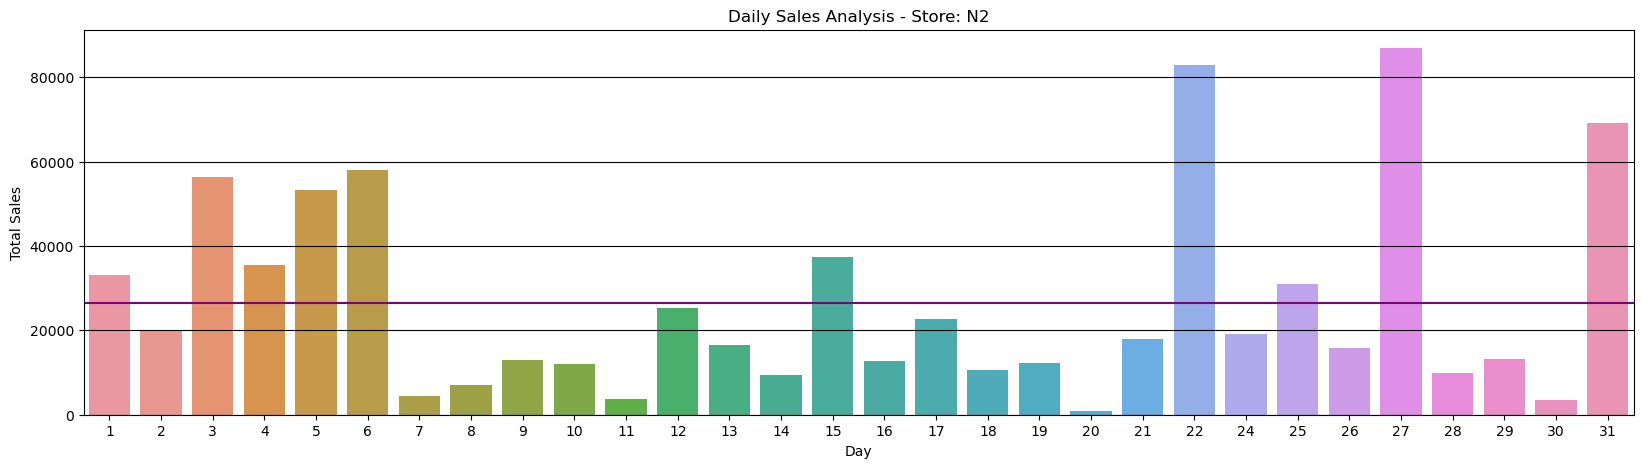

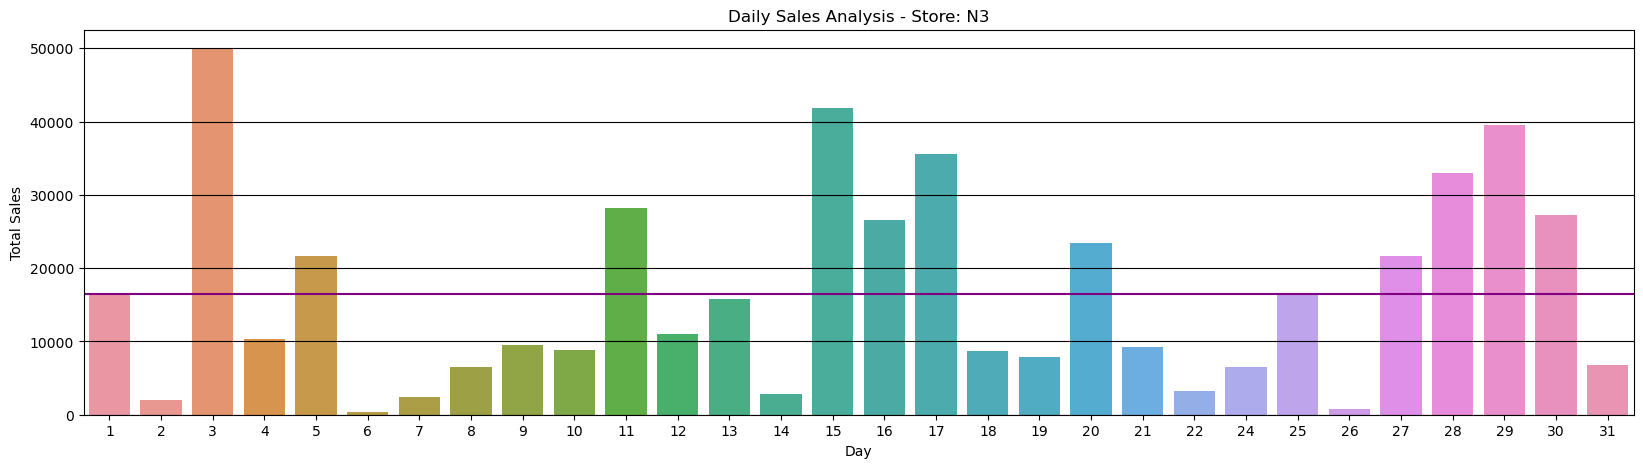

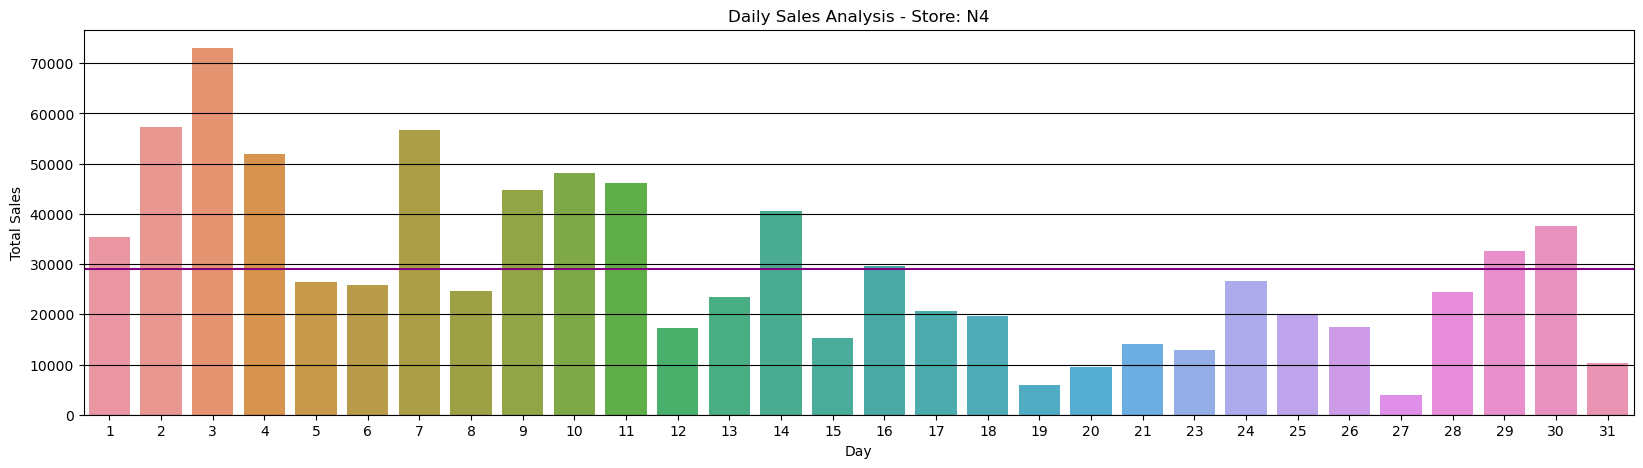

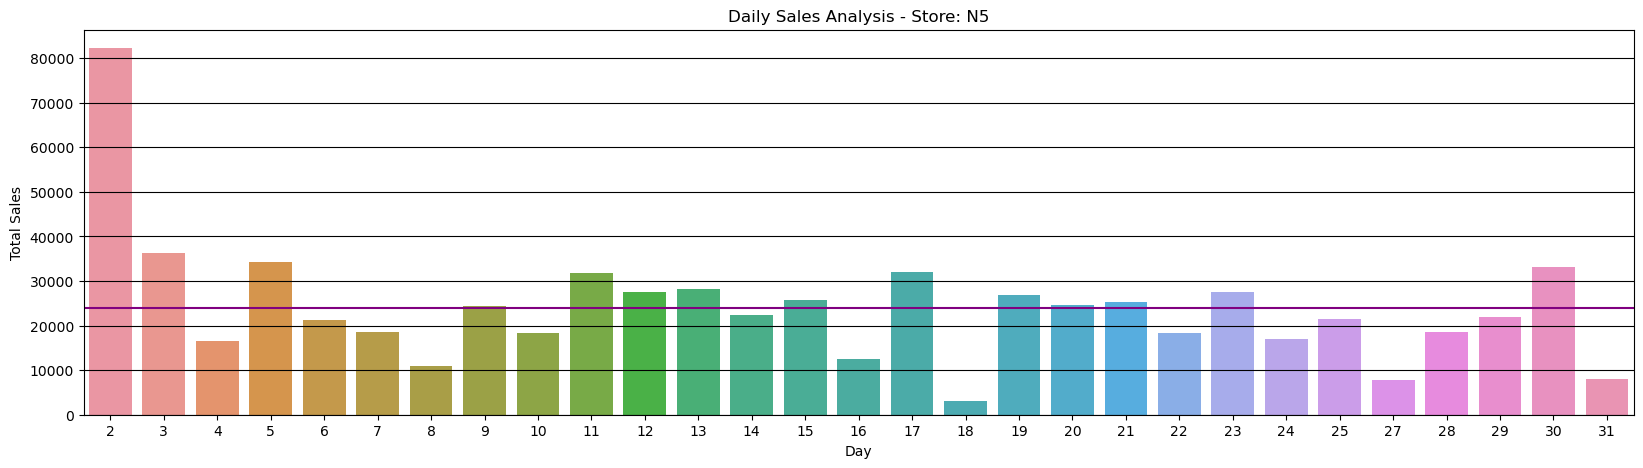

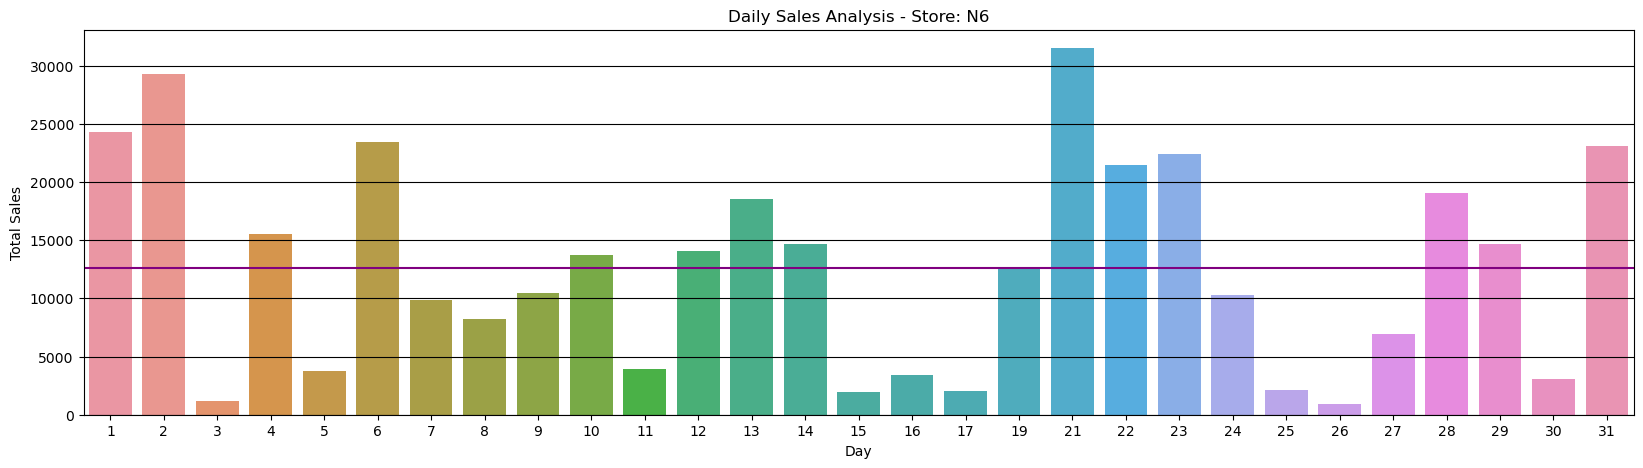

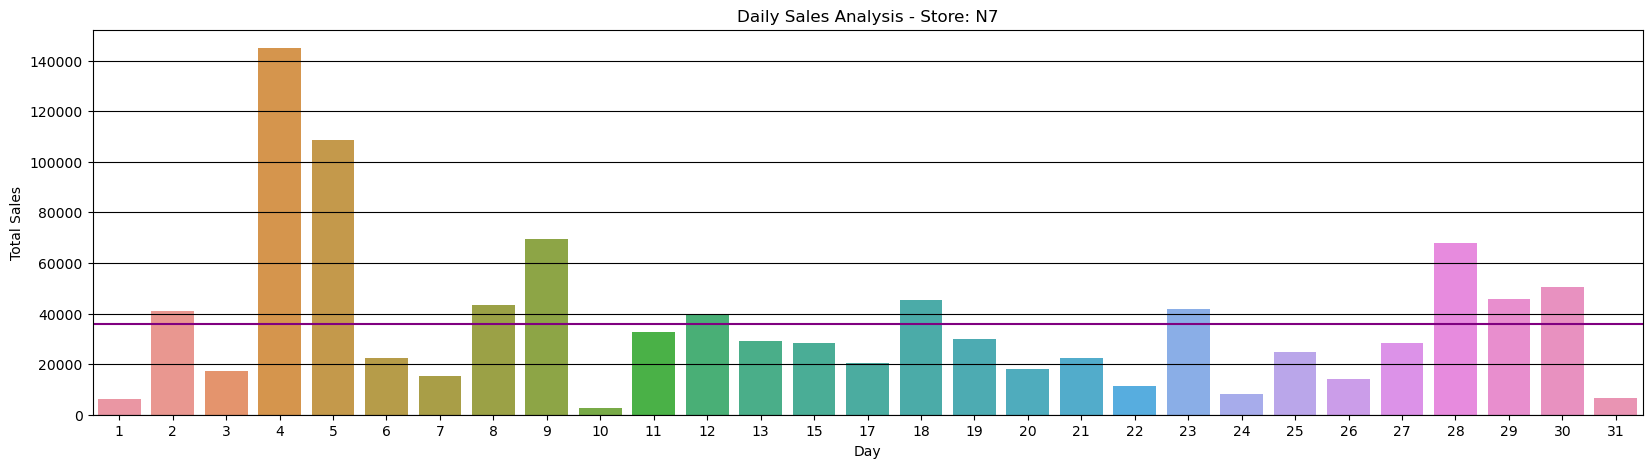

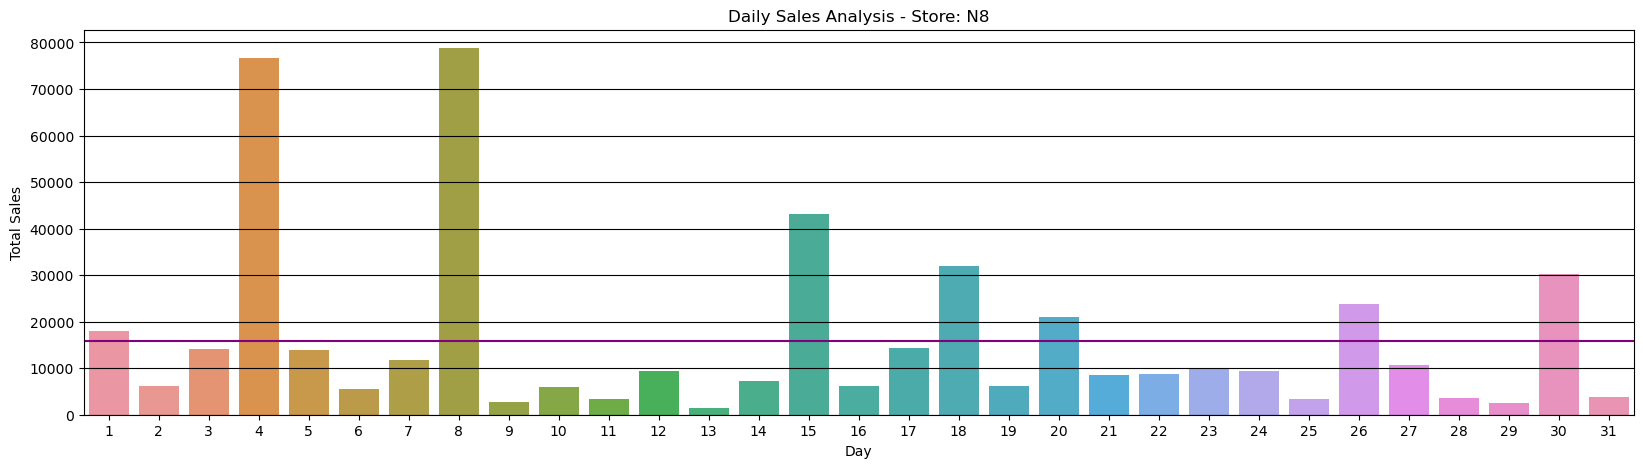

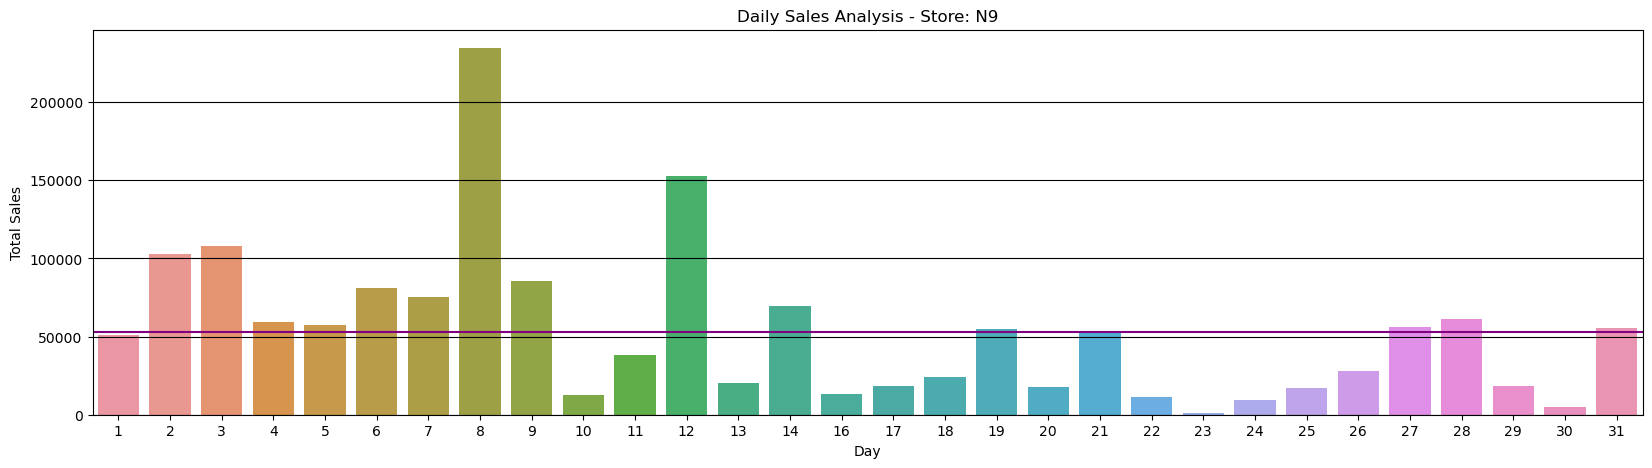

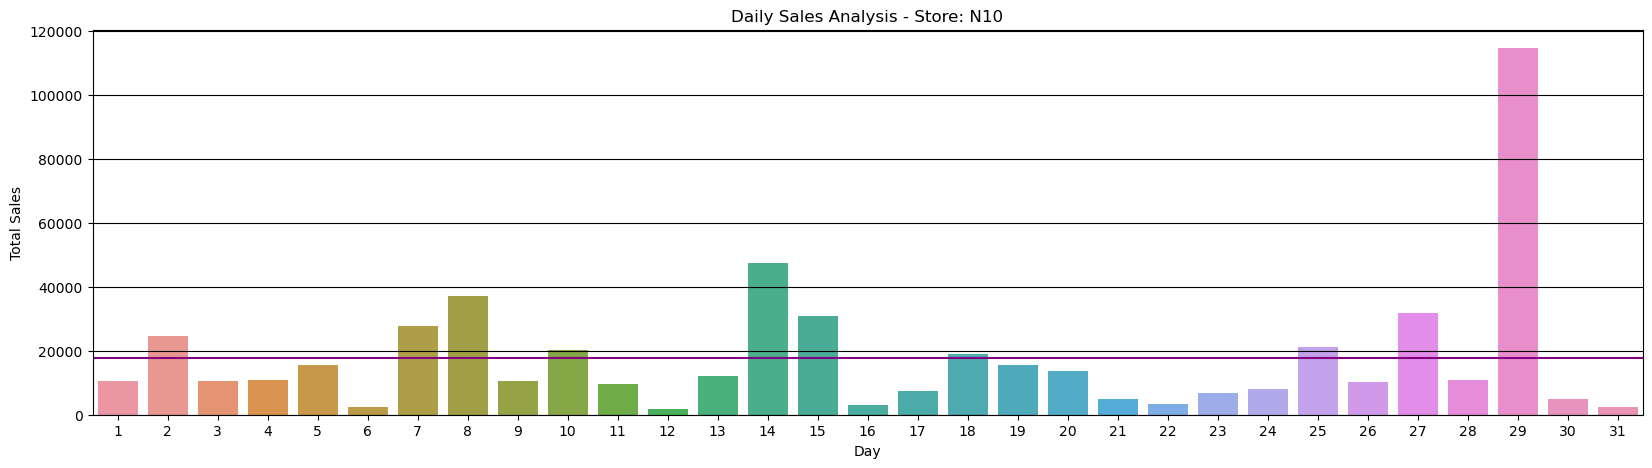

In [19]:
for i, storecode in enumerate(unique_storecodes[:10]): 
    store_data = data[data['STORECODE'] == storecode]
    daily_sales = store_data.groupby("DAY")["BILL_AMT"].sum().reset_index()

    plt.figure(figsize=(20, 5))
    sns.barplot(x=daily_sales['DAY'], y=daily_sales['BILL_AMT'],).axhline(daily_sales['BILL_AMT'].mean(), color='purple')
    plt.title("Daily Sales Analysis - Store: " + str(storecode))
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y', color='black')
    plt.show()

## 7.Store wise Best selling company

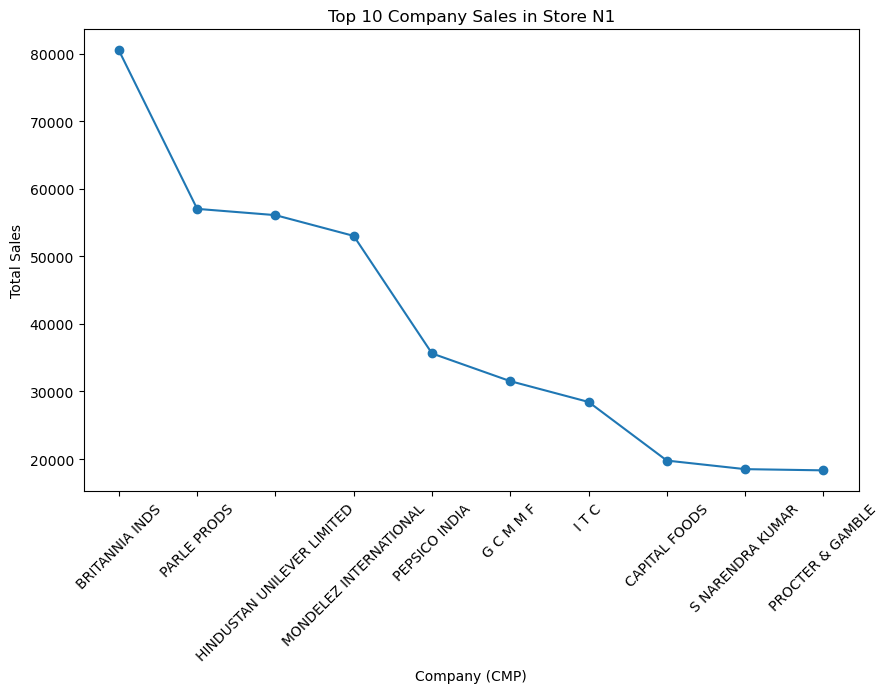

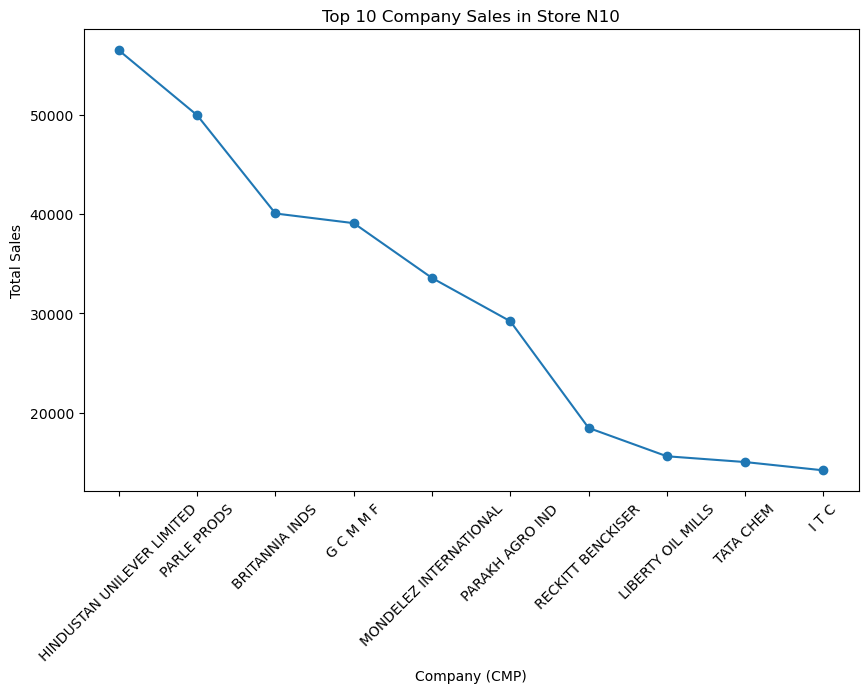

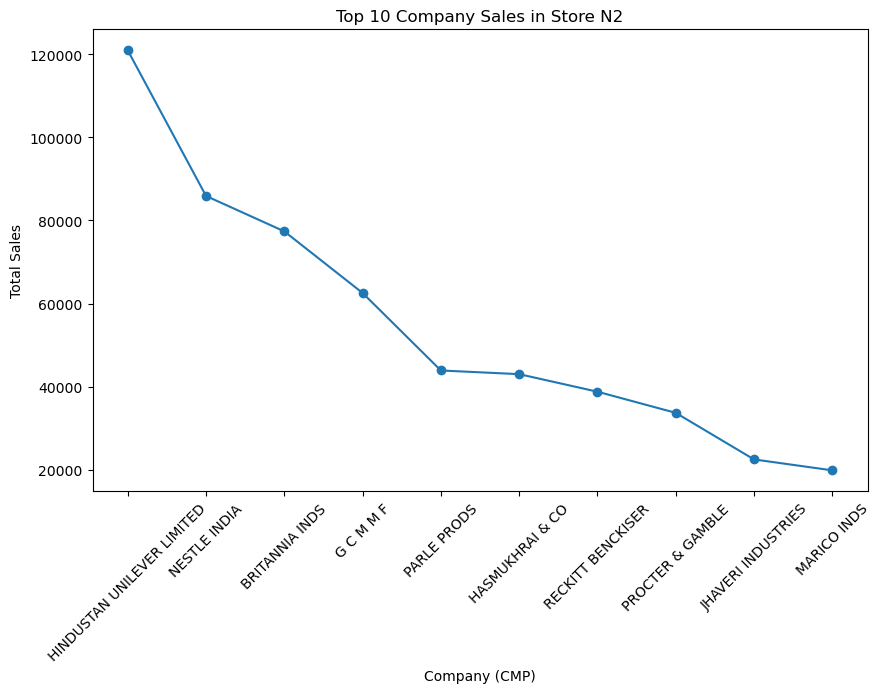

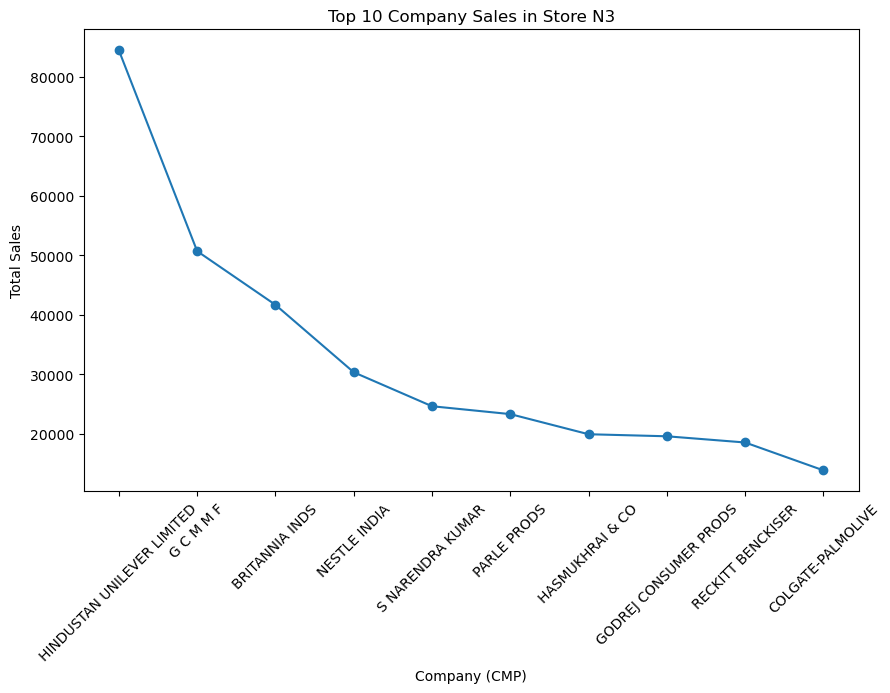

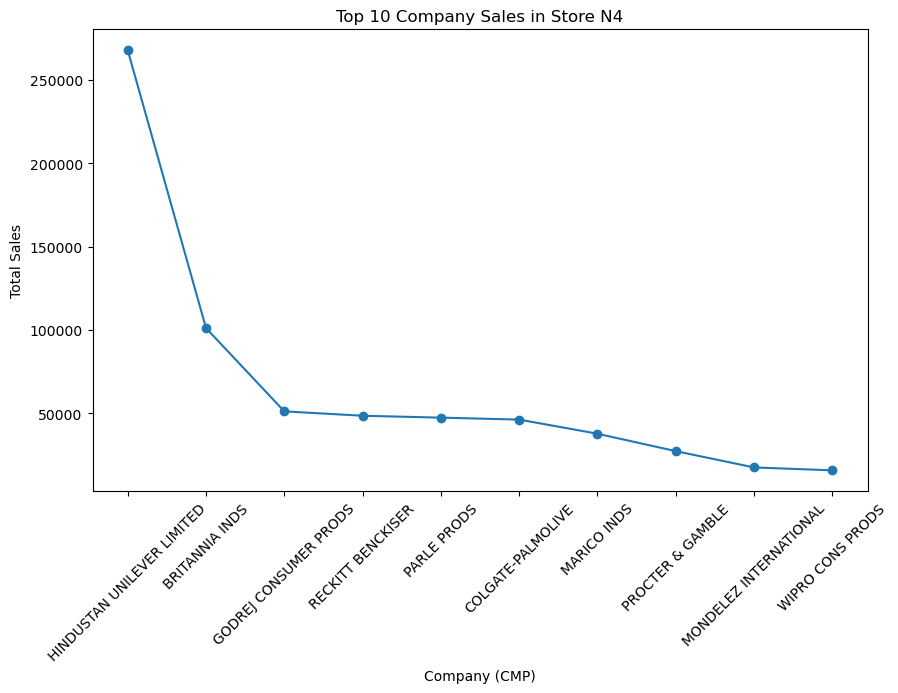

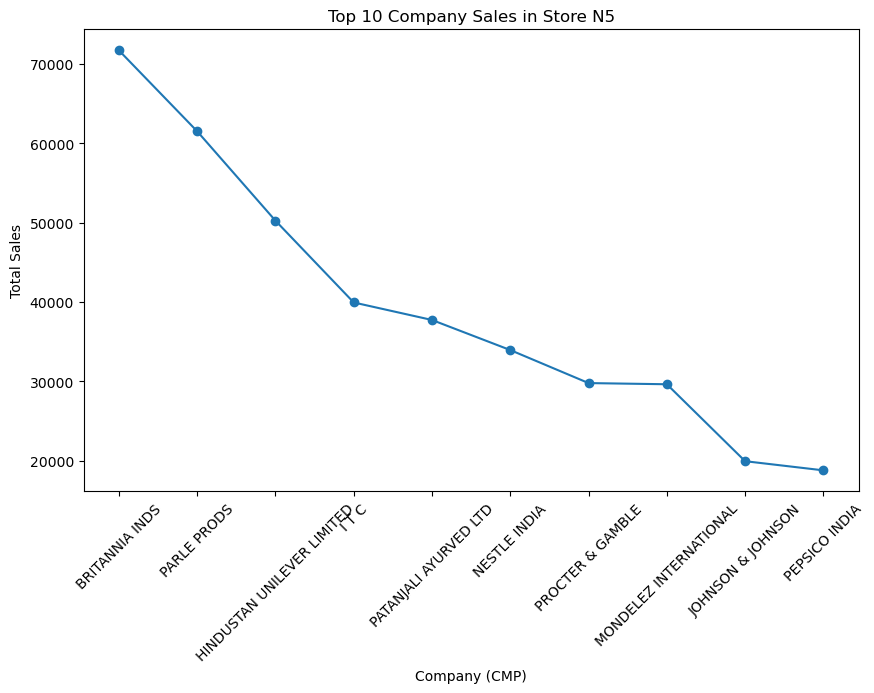

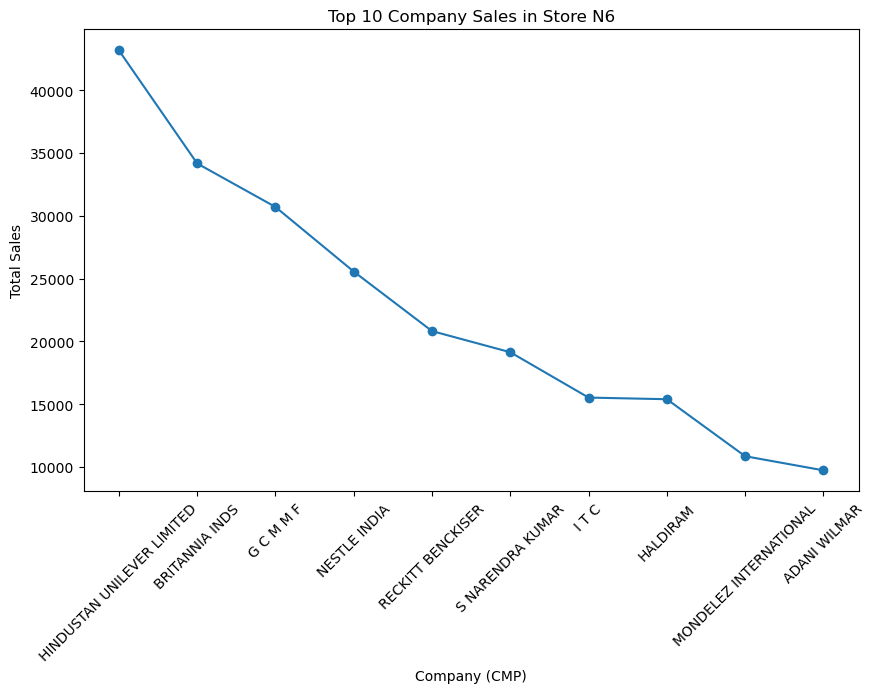

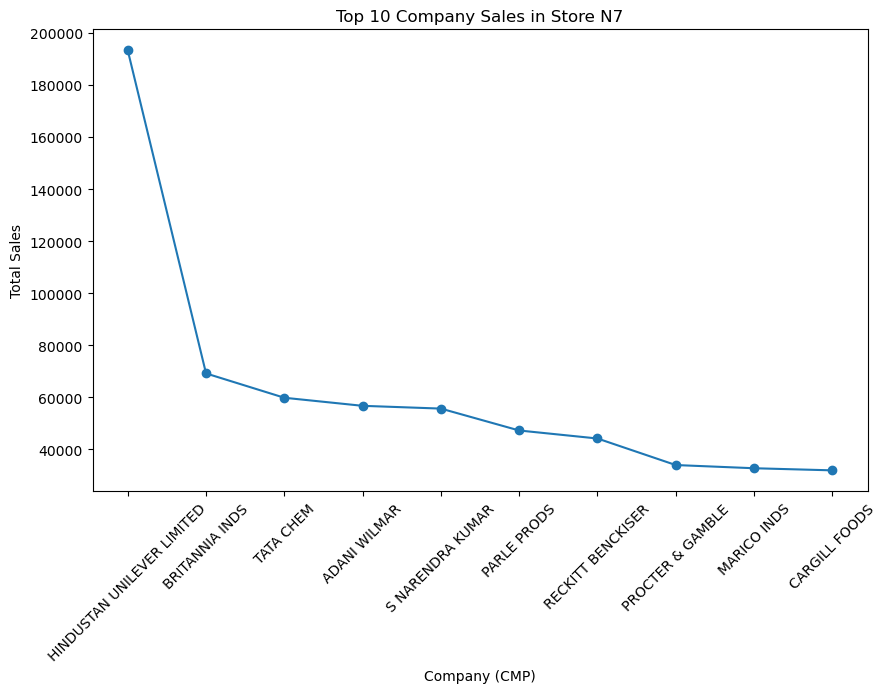

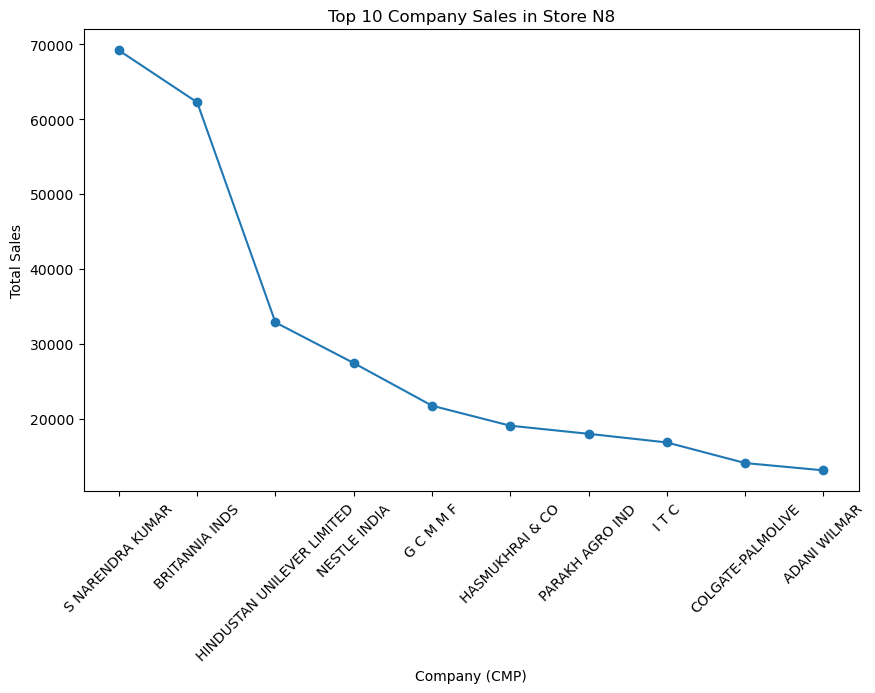

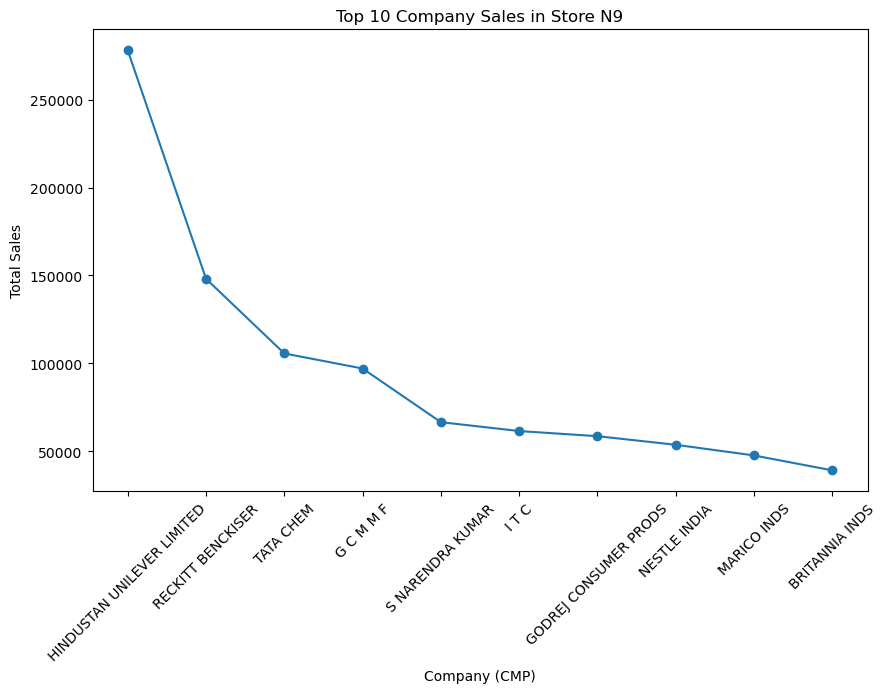

In [20]:
store_sales = data.groupby(['STORECODE', 'CMP'])['BILL_AMT'].sum().reset_index()
store_sales_sorted = store_sales.sort_values(by=['STORECODE', 'BILL_AMT'], ascending = [True, False])
top_10 = store_sales_sorted.groupby('STORECODE').head(10)
for s,d in top_10.groupby('STORECODE'):
    plt.figure(figsize = (10, 6))
    plt.plot(d['CMP'], d['BILL_AMT'], marker = 'o')
    plt.title(f'Top 10 Company Sales in Store {s}')
    plt.xlabel("Company (CMP)")
    plt.ylabel("Total Sales")
    plt.xticks(rotation = 45)
    plt.legend
    plt.tight_layout
    plt.show()

## 8. Store wise best selling product categories

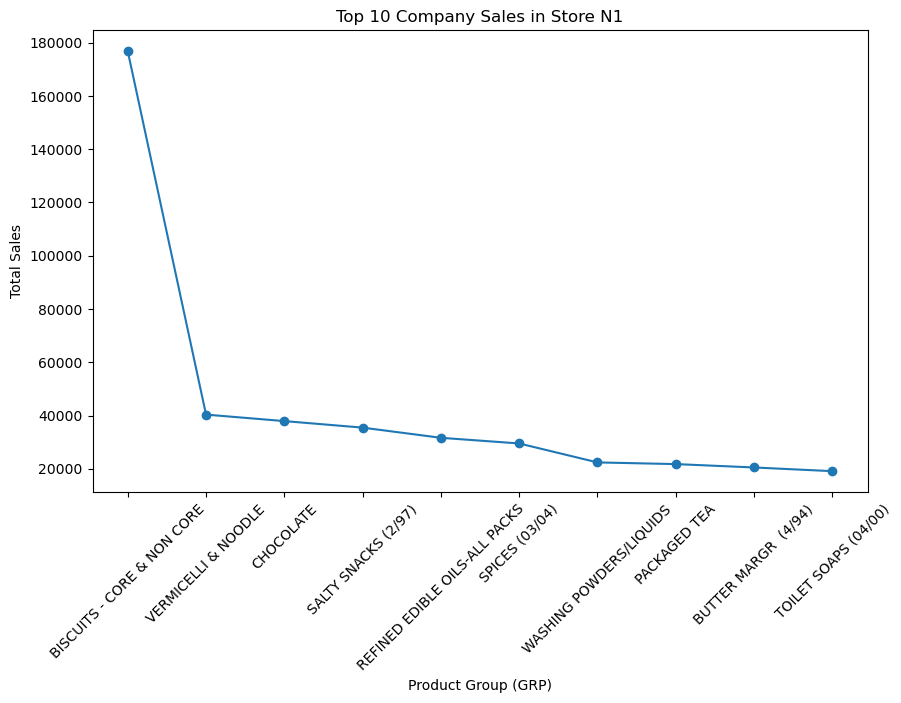

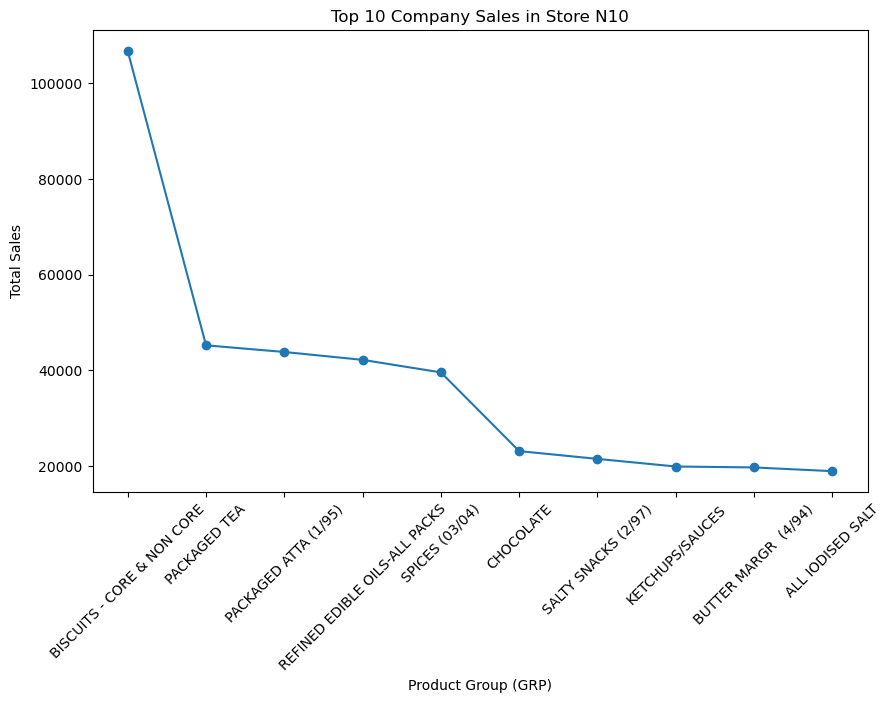

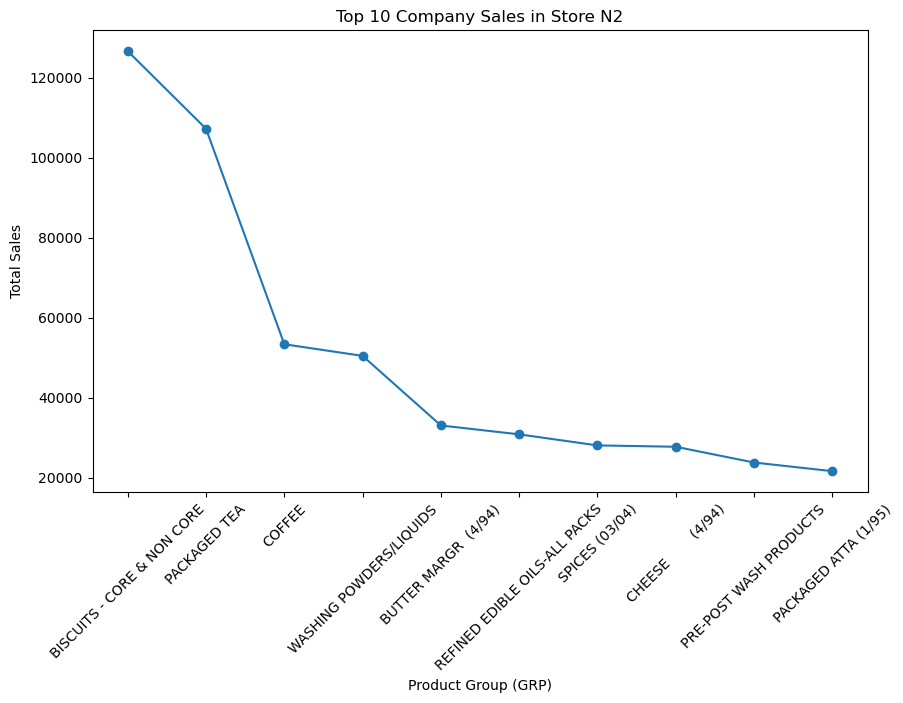

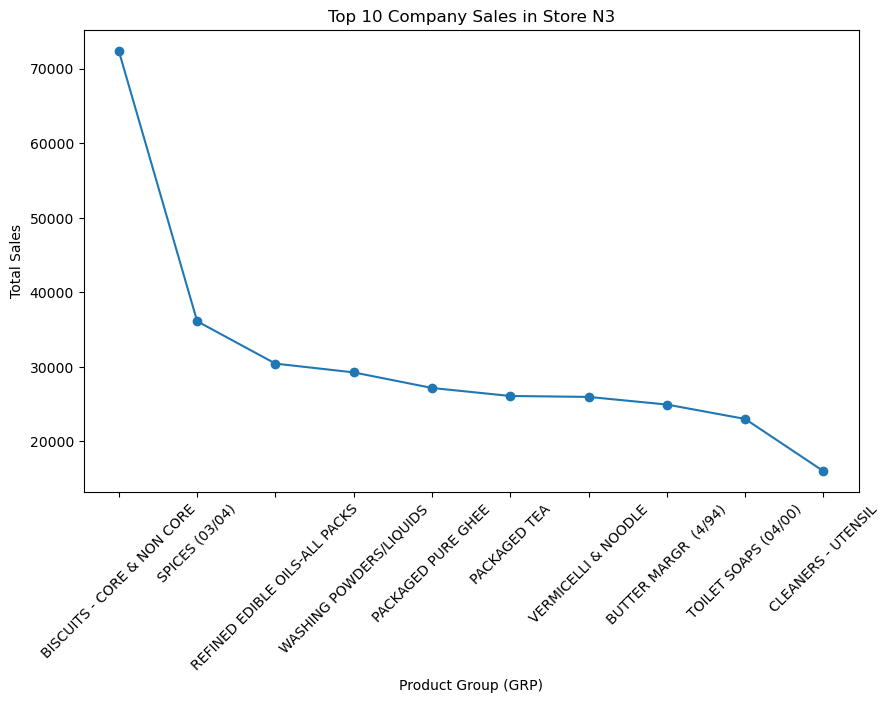

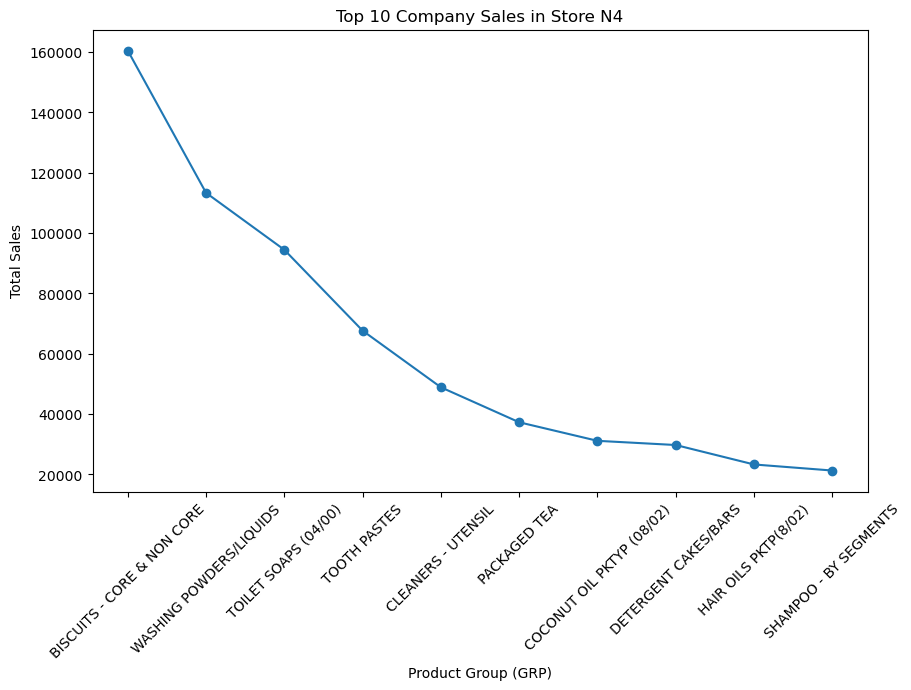

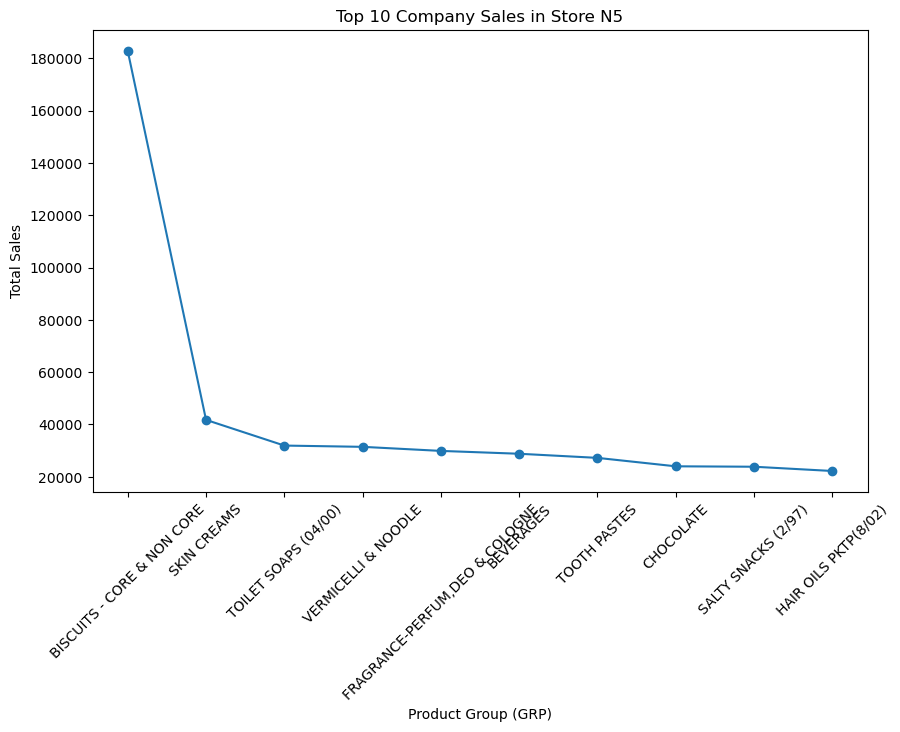

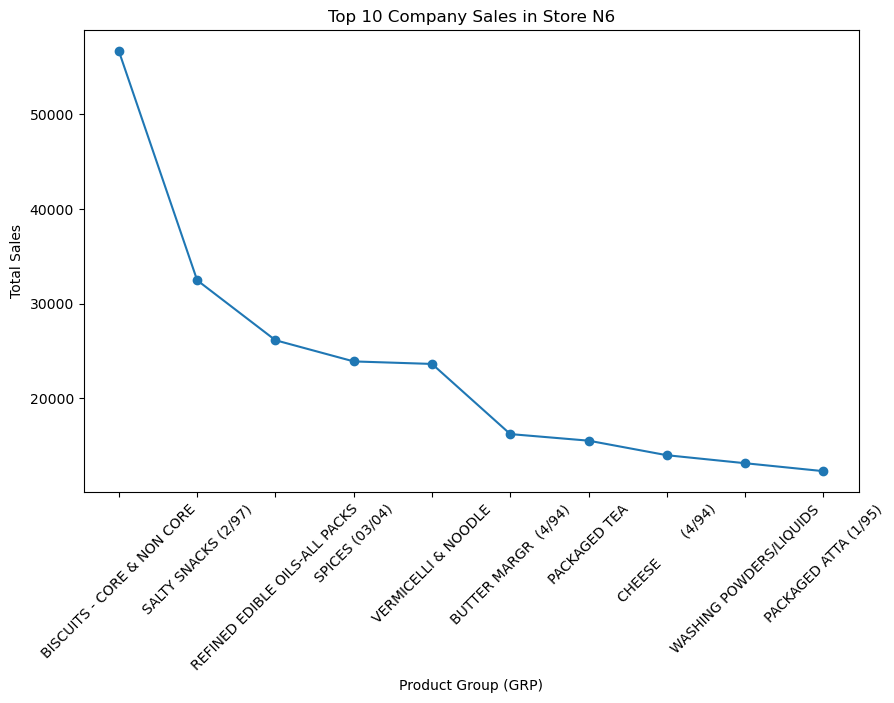

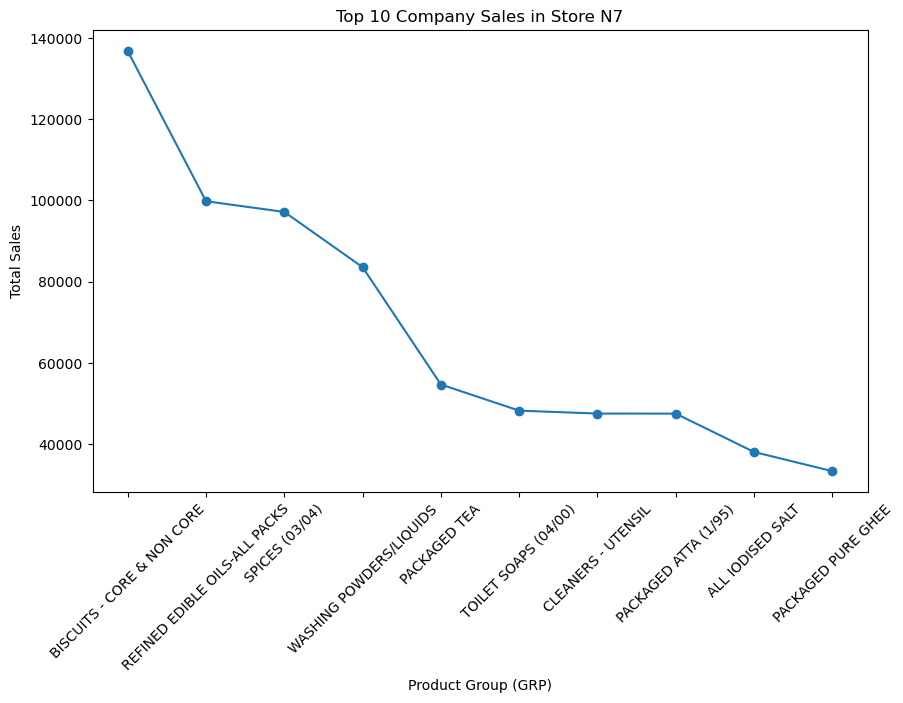

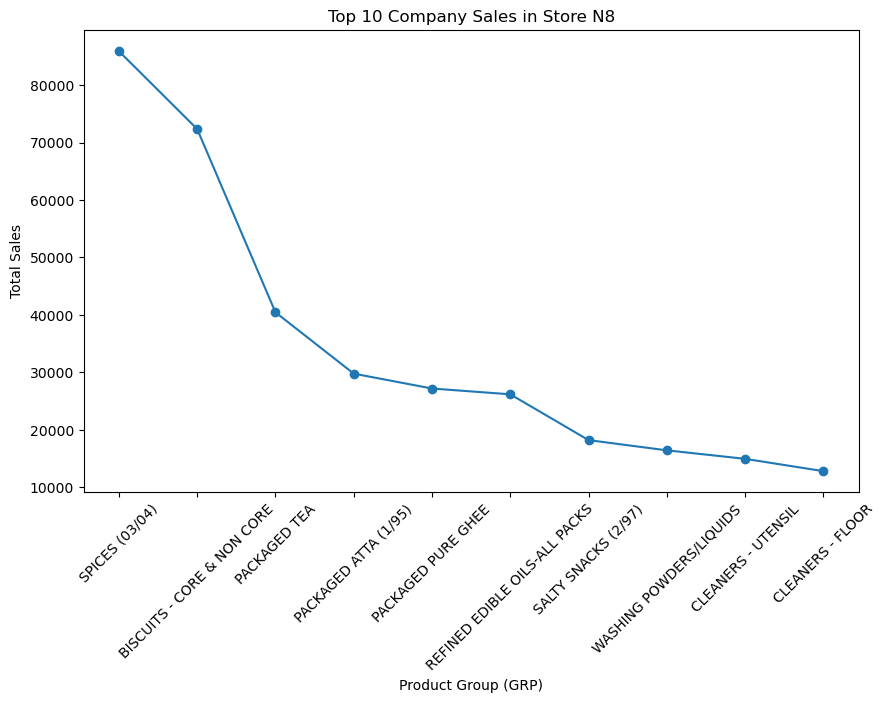

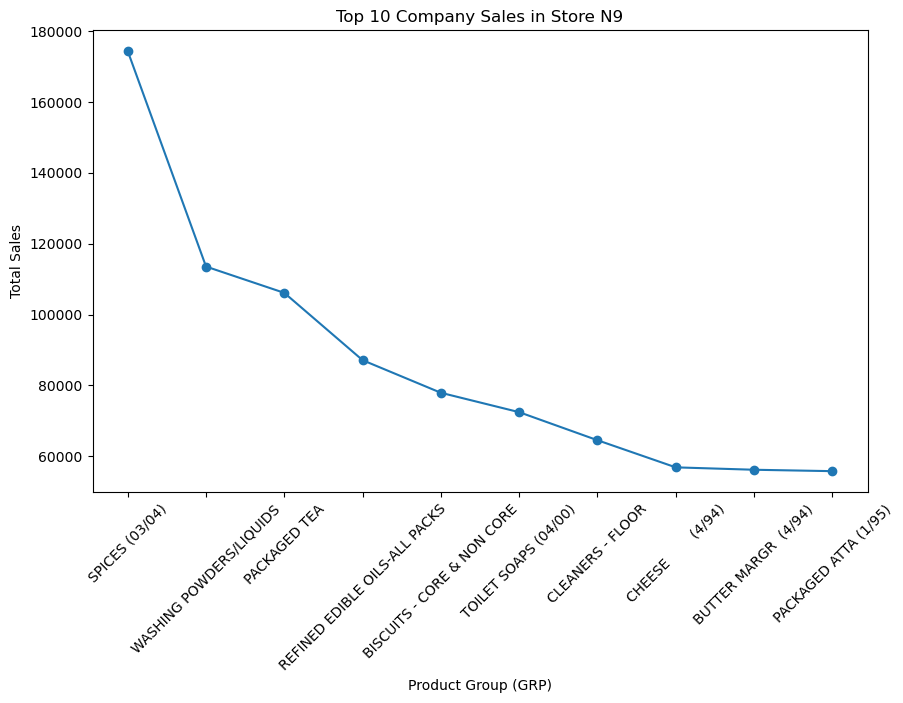

In [21]:
store_sales = data.groupby(['STORECODE', 'GRP'])['BILL_AMT'].sum().reset_index()
store_sales_sorted = store_sales.sort_values(by=['STORECODE', 'BILL_AMT'], ascending = [True, False])
top_10 = store_sales_sorted.groupby('STORECODE').head(10)
for s,d in top_10.groupby('STORECODE'):
    plt.figure(figsize = (10, 6))
    plt.plot(d['GRP'], d['BILL_AMT'], marker = 'o')
    plt.title(f'Top 10 Company Sales in Store {s}')
    plt.xlabel("Product Group (GRP)")
    plt.ylabel("Total Sales")
    plt.xticks(rotation = 45)
    plt.legend
    plt.tight_layout
    plt.show()

## 9. Sales of Top 20 companies

In [22]:
brand_sales = data.groupby('MBRD')['VALUE'].sum()

# Calculate the total sales
total_sales = data['VALUE'].sum()

# Calculate the percentage of sales for each brand
brand_percentages = (brand_sales / total_sales) * 100

# Display the percentage of sales for each brand
print(brand_percentages.sort_values(ascending = False)[0:20])

MBRD
AMUL                  6.233148
SOCIETY               3.684856
FORTUNE               3.522490
SURF                  2.098137
SAFFOLA               2.015670
AASHIRVAAD            2.006215
MAGGI                 1.892884
EVEREST               1.553675
DETTOL                1.527084
PATANJALI             1.519994
WHEEL                 1.479472
PARACHUTE             1.429695
NESCAFE               1.367448
MARIE GOLD            1.328376
GOWARDHAN             1.295050
GEMINI                1.214386
GOOD DAY              1.201609
CADBURY DAIRY MILK    1.186378
KISSAN                1.103200
SUNDAY                1.102407
Name: VALUE, dtype: float64


## 10. Overall Daily Sales of Super Market

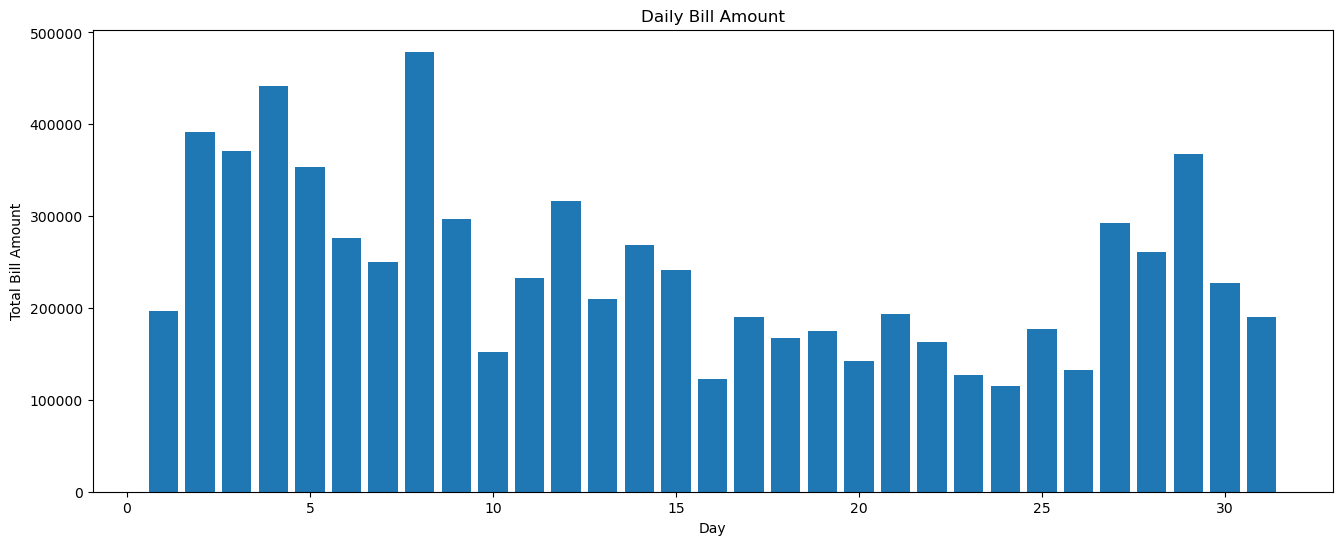

In [23]:
daily_total = data.groupby("DAY")["BILL_AMT"].sum()
plt.figure(figsize=(16, 6))
plt.bar(daily_total.index, daily_total.values)
plt.title('Daily Bill Amount')
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.ylabel('Total Bill Amount')
plt.show()